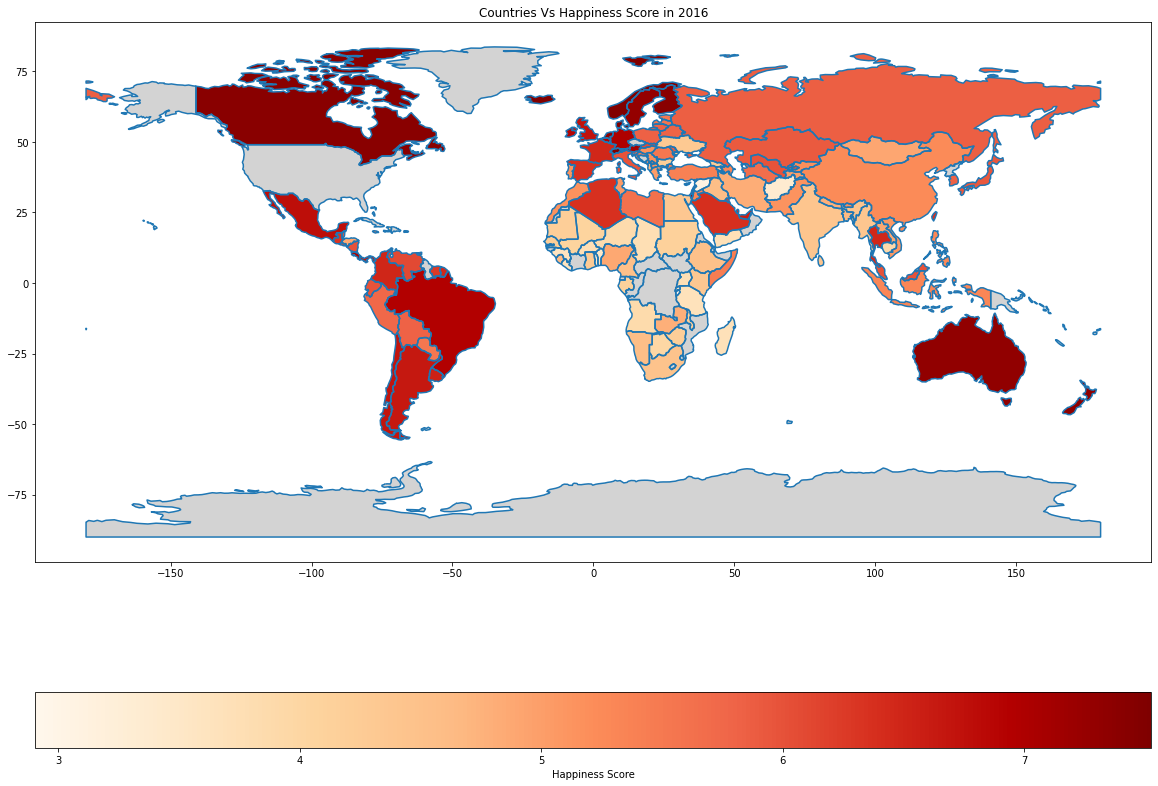

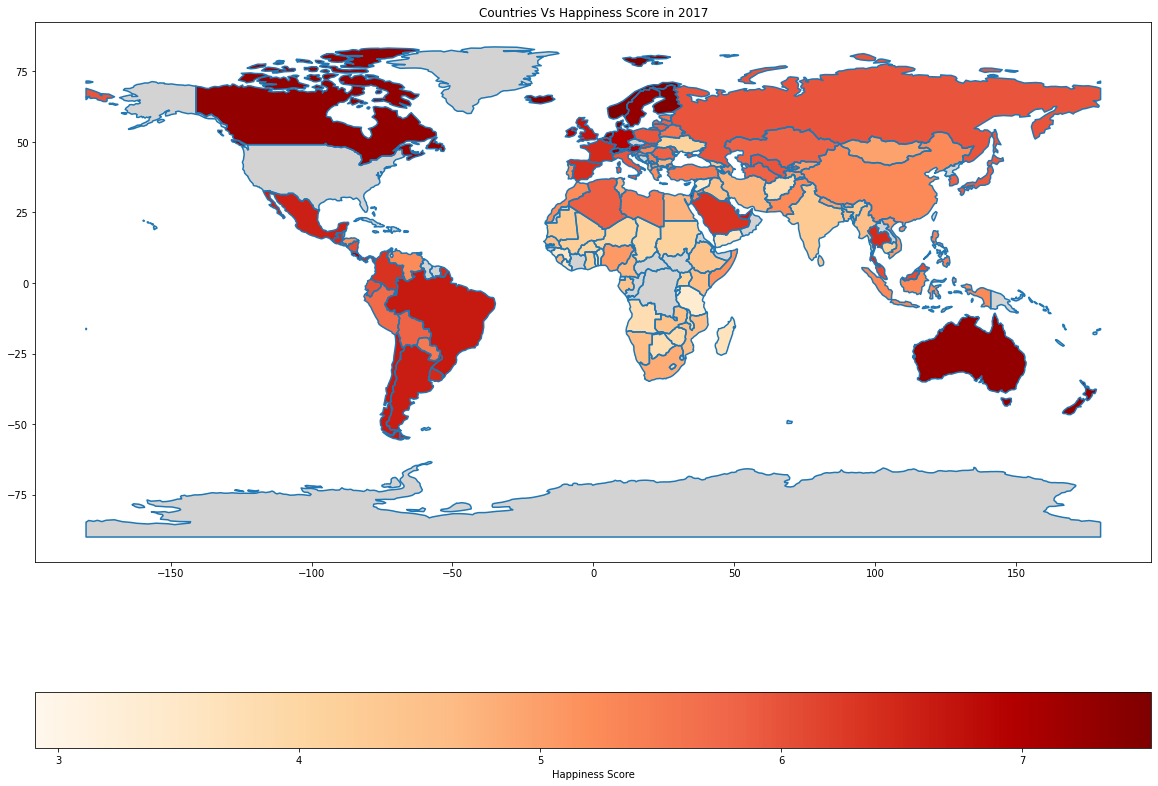

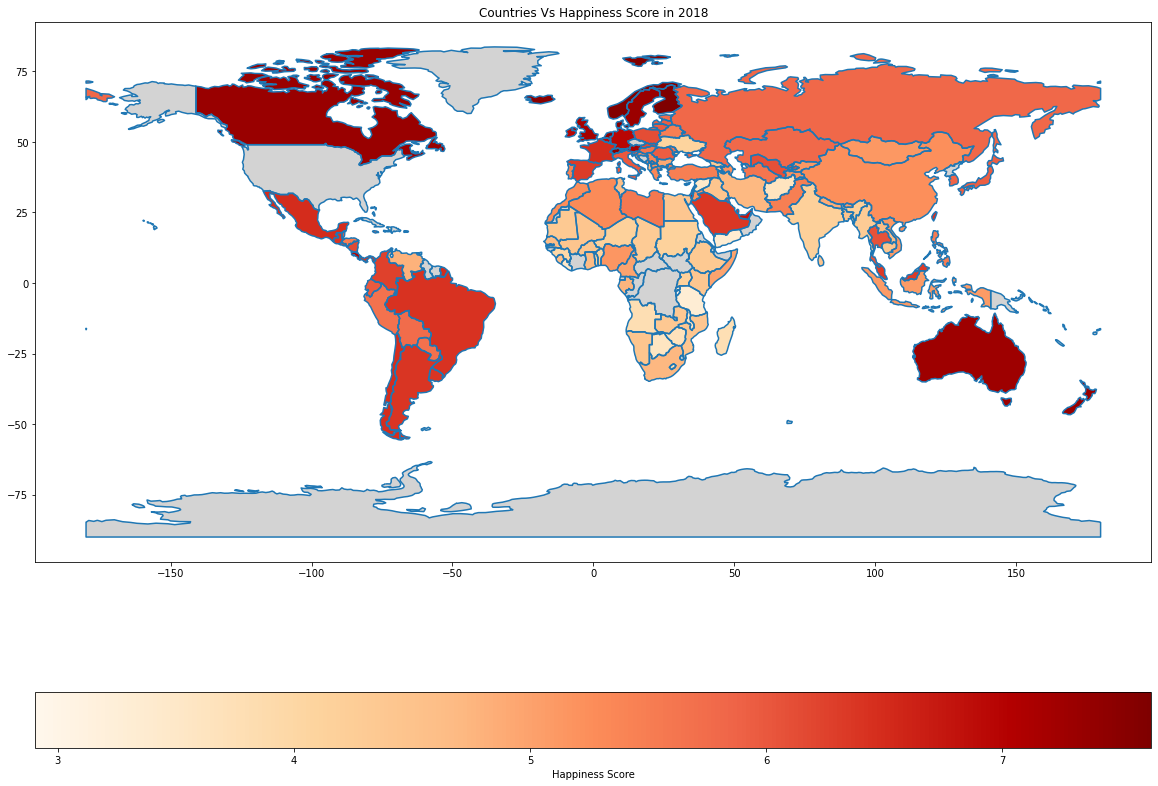

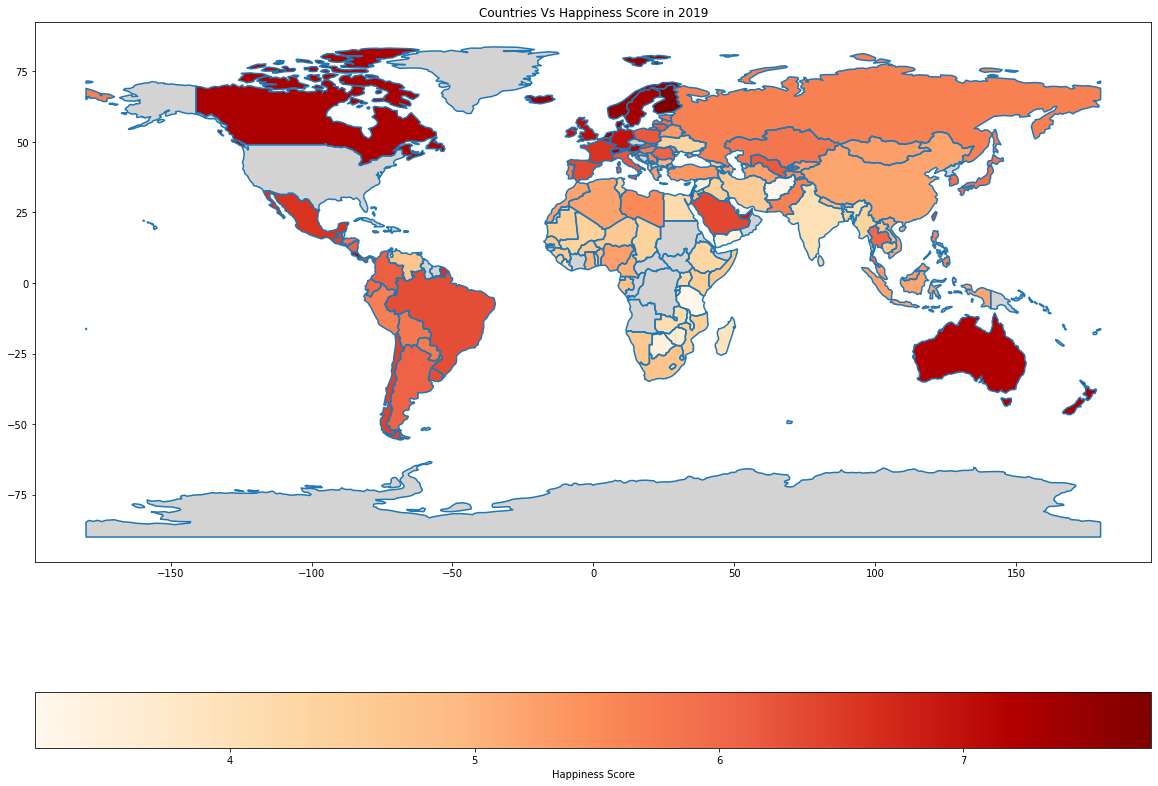

In [4]:
import pandas as pd
import transform_files as transform
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
import numpy as np


df_happiness = pd.read_csv('happiness.csv', index_col=0, header=0)
df_happiness['Happiness Status'] = transform.status_calc(df_happiness)

data = [df_happiness["Year"],df_happiness["Country"],df_happiness["Happiness Score"],df_happiness['Happiness Status']]
headers = ["Year","Country","Happiness Score","Happiness Status"]
df = pd.concat(data, axis=1, keys=headers)
# display(df)

# Group by year
df_distinct_year = df['Year'].unique()
df_distinct_year = df_distinct_year.astype(np.int32)
# display(df_distinct_year)
for year in df_distinct_year:
    df_by_year = df.loc[(df['Year']  == year)]
    year_str = str(year)
    # display(df_by_year)  
    # Summarise the happiness score per each country and plot it.
    df_countries_happiness = df_by_year.groupby(by="Country").agg({'Happiness Score':'count'}).reset_index().sort_values(by='Happiness Score', ascending=False)
    # ax = df_countries_happiness.plot.bar(x='Country', xlabel = '', figsize=(20,8))

    # import GeoPandas
    df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # merge word and happiness data
    df_world_happiness = df_world.merge(df_by_year, how="left", left_on=['name'], right_on=['Country'])
    df_world_happiness.head()
    ax = df_world["geometry"].boundary.plot(figsize=(20,16))
    df_world_happiness.plot( column="Happiness Score", ax=ax, cmap='OrRd', 
                         legend=True, legend_kwds={"label": "Happiness Score", "orientation":"horizontal"},missing_kwds={'color': 'lightgrey'})
    ax.set_title("Countries Vs Happiness Score in "+year_str)



